# **23.01.16 Check synchronization with graph**

In [1]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import numpy as np

from tqdm.notebook import tqdm
import pandas as pd

from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.To_Draw import Draw_theoretical as DDD
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_init_pvel as Hp
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from TO_sim.Utility import *

In [2]:
DF = 'Review/23.01.16 Check synchronization with graph/'
Create_Folder(DF)

In [5]:
N = 500
dist = 'Normal'
t_end = 200
ss = 14
N = 500
dK = 0.2
dt = 0.1
m = 0
applys = [1]
save = True
ms = [6,2,0.95]
# Draw_ = DD(m=m,dist = 'Normal')
df_sets = {}
rdf_sets = {}

for m in ms:
    df,rdf = Hp(m,N=N,t_end=t_end,dist = dist,dt = 0.1,dK=dK, shuffle = True, shuffle_seed = ss+1,Init_dtheta=False,Init_dtheta_seed=applys, seed=10)
    df_sets[m] = df
    rdf_sets[m] = rdf

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

In [4]:
ms = [6,2,0.95,0]


In [3]:
df_sets

NameError: name 'df_sets' is not defined

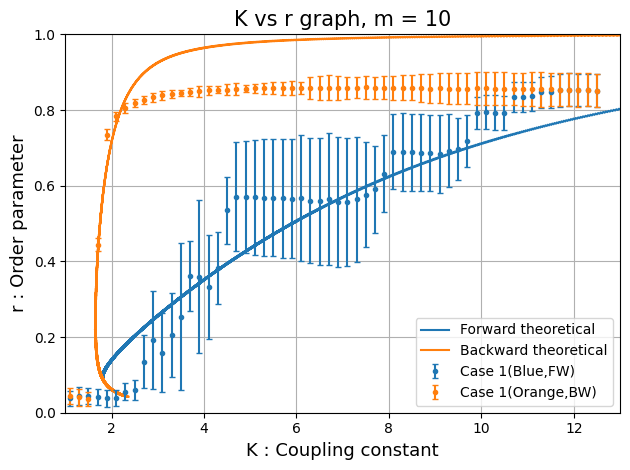

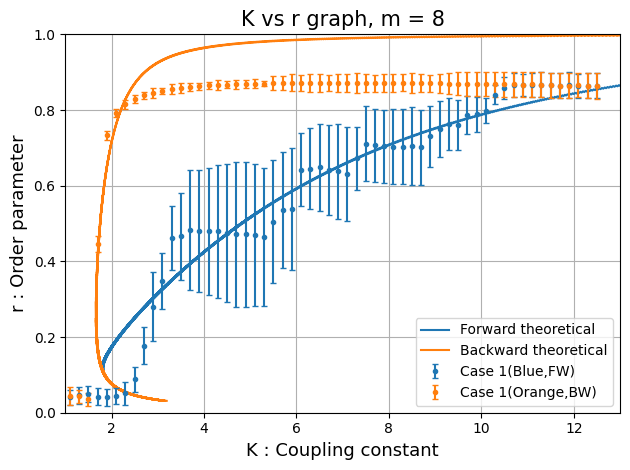

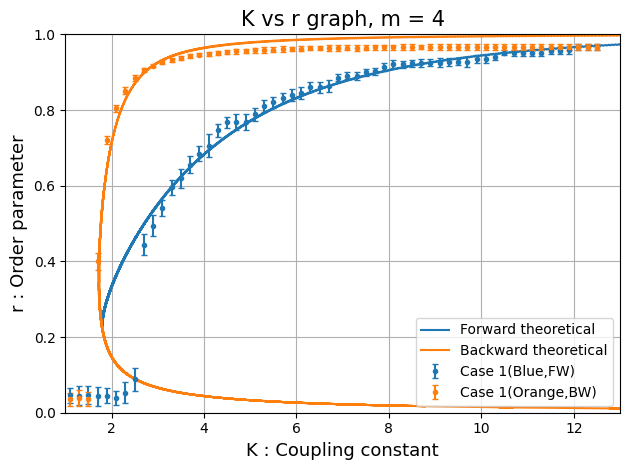

In [51]:
ST = 50
Ks = df.index
Ksr = rdf.index
Create_Folder(DF+f'{dist} 01.17/')
for m in ms:
    df = df_sets[m]
    rdf = rdf_sets[m]
    plt.figure(facecolor='white')
    data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    Draw_ = DD(m=m,dist='Normal')
    Draw_.total()

    plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=2,label='Case 1(Blue,FW)')
    plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=2,label='Case 1(Orange,BW)')

    # plt.plot(Ks,data_rs,'.',label=r"$Forward$",markersize=6,color = 'Tab:Blue',)
    # plt.plot(Ksr,data_rrs,'.',label=r"$Backward$",markersize=6,color = 'Tab:Orange',)
    plt.legend()  
    plt.title(f'K vs r graph, m = {m}',fontsize= 15)
    plt.grid()

    plt.xlim(1,13)
    plt.ylim(0,1)

    plt.xlabel('K : Coupling constant',fontsize=13)
    plt.ylabel('r : Order parameter',fontsize=13)
    plt.tight_layout()
    plt.savefig(DF+f'{dist} 01.17/m = {m}, K vs r graph.png',dpi=400)

In [6]:
Ks = df.index
Ksr = rdf.index

In [7]:
m = 6
df = df_sets[m]
rdf = rdf_sets[m]

In [8]:
def mean_wtime(x):
    temp = x[-200:,:]
    result = np.mean(temp,axis=0)
    return result

def omega_DP(df_sets,m):
    df = df_sets[m]
    Ks = df.index
    O_D,O_P = [],[]
    d_mean,d_min,d_max = [],[],[]
    p_mean,p_min,p_max = [],[],[]
    def mmm(temp,x):
        mean_,min_,max_ = np.mean(temp),np.min(x),np.max(x)
        return np.array([mean_,min_,max_])
    for K in Ks:
        x = df.loc[K].rs
        temp = x[-200:]
        omega_D = mmm(temp,x)*K
        omega_P = (4 / np.pi) * np.sqrt(omega_D / m)
        O_D.append(omega_D)
        O_P.append(omega_P)
    O_D,O_P = map(np.array,[O_D,O_P])
    return O_D,O_P


def omega_DP_(df_sets,m):
    df = df_sets[m]
    Ks = df.index
    O_D,O_P = [],[]
    d_mean,d_min,d_max = [],[],[]
    p_mean,p_min,p_max = [],[],[]
    def mmm(temp,x):
        mean_,min_,max_ = np.mean(temp),np.min(x),np.max(x)
        return np.array([mean_,min_,max_])
    for K in Ks:
        x = df.loc[K].rs
        temp = x[-200:]
        omega_D = np.mean(temp)*K
        omega_P = (4 / np.pi) * np.sqrt(omega_D / m)
        O_D.append(omega_D)
        O_P.append(omega_P)
    O_D,O_P = map(np.array,[O_D,O_P])
    return O_D,O_P

In [9]:
ODf.shape

NameError: name 'ODf' is not defined

In [10]:
m = 0.95
df = df_sets[m]
rdf = rdf_sets[m]
temp_df = df.dtheta_s.apply(mean_wtime)
temp_rdf = rdf.dtheta_s.apply(mean_wtime)
A = np.array(temp_df.to_list())
B = np.array(temp_rdf.to_list())

In [11]:
omega = df.iloc[0].Omega
N_omega = (omega-np.min(omega))/(np.max(omega)-np.min(omega))
N_omega = (omega+3)/6

In [12]:
dK

0.2

NameError: name 'ODf' is not defined

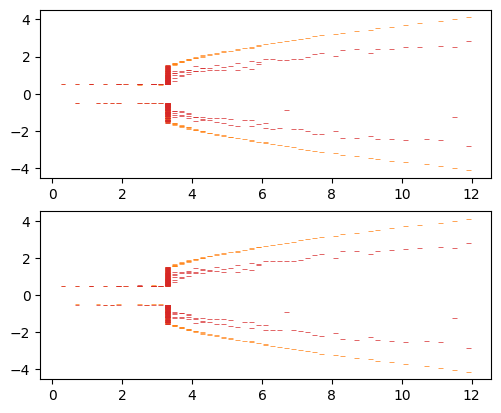

In [13]:
fig = plt.figure(figsize=(12.8,4.8))
plt.subplot(221)
for i in range(len(A)-1):
    temp1 = np.where(np.abs(A[i])>0.5)
    temp2 = np.where(np.abs(A[i+1])<0.5)
    A_ = np.intersect1d(temp1,temp2)
    plt.subplot(221)
    plt.hlines(omega[A_],[Ks[i]-dK/3],[Ks[i]+dK/3],color='tab:orange',zorder=5,lw=0.5)
    plt.hlines(A[i][A_],[Ks[i]-dK/3],[Ks[i]+dK/3],color='tab:red',zorder=5,lw=0.5)

    plt.subplot(223)
    plt.hlines(omega[A_],[Ks[i]-dK/3],[Ks[i]+dK/3],color='tab:orange',zorder=5,lw=0.5)
    plt.hlines(A[i][A_],[Ks[i]-dK/3],[Ks[i]+dK/3],color='tab:red',zorder=5,lw=0.5)
    # print(A[i][A_])
plt.subplot(221)
plt.plot(Ks,ODf,color='tab:orange',alpha=0.8,lw=0.2)
plt.plot(Ks,-ODf,color='tab:orange',alpha=0.8,lw=0.2)
plt.plot(Ks,OPf,color='tab:blue',alpha=0.8,lw=0.2)
plt.plot(Ks,-OPf,color='tab:blue',alpha=0.8,lw=0.2)
plt.vlines(Ks,[-3],[3],color='black',alpha=0.5,lw=0.1)
plt.xlim(0.1,12.5)
plt.ylim(-3,3)

plt.subplot(222)
plt.scatter
for i in range(len(B)-1):
    temp1 = np.where(np.abs(B[i])<0.5)
    temp2 = np.where(np.abs(B[i+1])>0.5)
    A_ = np.intersect1d(temp1,temp2)
    plt.subplot(222)
    plt.hlines(omega[A_],[Ksr[i]+dK/3],[Ksr[i]-dK/3],color='tab:orange',zorder=5,lw=0.5)
    plt.hlines(B[i][A_],[Ksr[i]+dK/3],[Ksr[i]-dK/3],color='tab:red',zorder=5,lw=0.5)
    plt.subplot(224)
    plt.hlines(omega[A_],[Ksr[i]+dK/3],[Ksr[i]-dK/3],color='tab:orange',zorder=5,lw=0.5)
    plt.hlines(B[i][A_],[Ksr[i]+dK/3],[Ksr[i]-dK/3],color='tab:red',zorder=5,lw=0.5)

    # print(A[i][A_])
plt.subplot(222)
plt.yticks([]) 
plt.plot(Ksr,ODr,color='tab:orange',alpha=0.8,lw=0.2)
plt.plot(Ksr,-ODr,color='tab:orange',alpha=0.8,lw=0.2)
plt.plot(Ksr,OPr,color='tab:blue',alpha=0.8,lw=0.2)
plt.plot(Ksr,-OPr,color='tab:blue',alpha=0.8,lw=0.2)
plt.vlines(Ks,[-3],[3],color='black',alpha=0.5,lw=0.1)
plt.ylim(-3,3)
plt.legend(['natural frequecny','effective frequecny'])
plt.xlim(12.5,0.1)
plt.ylim(-3,3)
plt.tight_layout()


#######
color = plt.cm.viridis(N_omega)
# fig = plt.figure(figsize=(12.8,4.8))
plt.subplot(223)
for i,mean_pv in enumerate(A.T):
    plt.plot(Ks,mean_pv,color = color[i],zorder=2);
plt.plot(Ks,ODf,color='tab:orange',alpha=0.8,lw=0.2)
plt.plot(Ks,-ODf,color='tab:orange',alpha=0.8,lw=0.2)
plt.plot(Ks,OPf,color='tab:blue',alpha=0.8,lw=0.2)
plt.plot(Ks,-OPf,color='tab:blue',alpha=0.8,lw=0.2)
plt.vlines(Ks,[-3],[3],color='black',alpha=0.5,lw=0.1)
plt.xlim(0.1,12.5)
plt.ylim(-3.,3.)

plt.subplot(224)
ax2 = plt.gca()
plt.yticks([]) 
for i,mean_pv in enumerate(B.T):
    ax2.plot(Ksr,mean_pv,color = color[i]);
plt.vlines(Ksr,[-3],[3],color='black',alpha=0.5,lw=0.1)
plt.plot(Ksr,ODr,color='tab:orange',alpha=0.8,lw=0.2)
plt.plot(Ksr,-ODr,color='tab:orange',alpha=0.8,lw=0.2)
plt.plot(Ksr,OPr,color='tab:blue',alpha=0.8,lw=0.2)
plt.plot(Ksr,-OPr,color='tab:blue',alpha=0.8,lw=0.2)
ax2.invert_xaxis()
plt.xlim(12.5,0.1)
plt.ylim(-3.,3.)
# plt.colorbar()
plt.tight_layout()

In [14]:
omega = df.iloc[0].Omega

In [15]:
N_omega = (omega-np.min(omega))/(np.max(omega)-np.min(omega))
N_omega = (omega+3)/(6)

In [16]:
KR = lambda df, K: df["rs"][K] * K
KMR = lambda x, m: (4 / np.pi) * np.sqrt(x / m)

In [17]:
def make_mean_phase_vel(m):
    df = df_sets[m]
    rdf = rdf_sets[m]
    temp_df = df.dtheta_s.apply(mean_wtime)
    temp_rdf = rdf.dtheta_s.apply(mean_wtime)
    F_pv = np.array(temp_df.to_list())
    R_pv = np.array(temp_rdf.to_list())
    return F_pv,R_pv

In [18]:
m = 2
df = df_sets[m]
rdf = rdf_sets[m]

In [19]:
A,B = make_mean_phase_vel(m)
omega = df.iloc[0].Omega
N_omega = (omega-np.min(omega))/(np.max(omega)-np.min(omega))
N_omega = (omega+3)/6
ODf,OPf = omega_DP(df_sets,m)
ODr,OPr = omega_DP(rdf_sets,m)

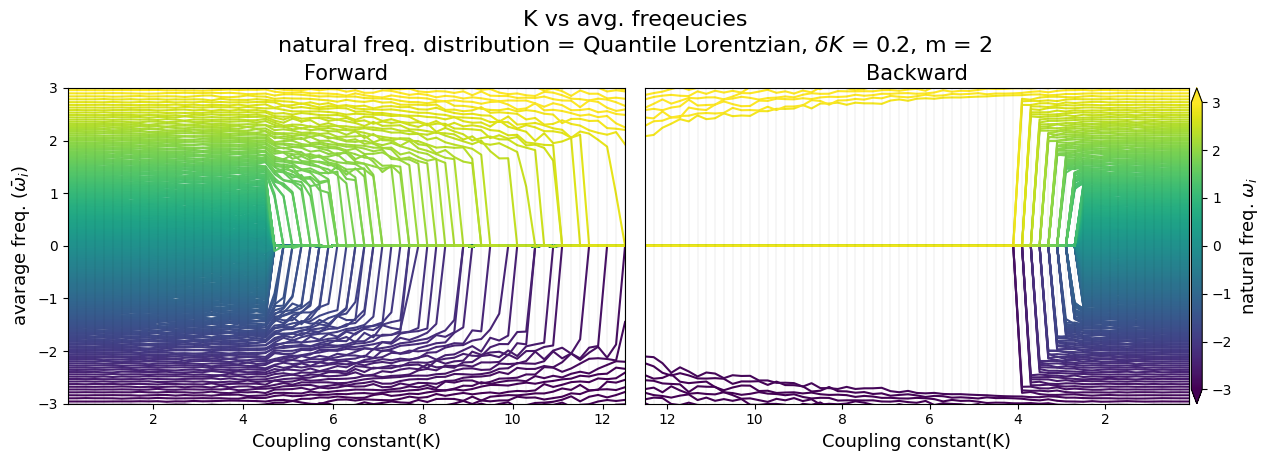

In [20]:
color = plt.cm.viridis(N_omega)
fig = plt.figure(figsize=(12.8,4.8))
plt.subplot(121)
plt.title('Forward',fontsize=15)
sca = plt.scatter(0*omega,0*omega,s=0,c=omega,vmin=-3,vmax=3)
for i,mean_pv in enumerate(A.T):
    plt.plot(Ks,mean_pv,color = color[i]);
# plt.plot(Ks,ODf,color='tab:orange')
# plt.plot(Ks,-ODf,color='tab:orange')
# plt.plot(Ks,OPf,color='tab:blue')
# plt.plot(Ks,-OPf,color='tab:blue')
plt.vlines(Ks,[-3],[3],color='black',alpha=0.5,lw=0.1)
plt.xlim(0.1,12.5)
plt.xlabel('Coupling constant(K)',fontsize=13)
plt.ylabel(r'avarage freq. ($\bar{\omega}_i$)',fontsize=13)
plt.ylim(-3,3)

plt.subplot(122)
plt.title('Backward',fontsize=15)
ax2 = plt.gca()
plt.yticks([]) 
for i,mean_pv in enumerate(B.T):
    ax2.plot(Ksr,mean_pv,color = color[i]);
plt.vlines(Ksr,[-3],[3],color='black',alpha=0.5,lw=0.1)

# plt.plot(Ksr,ODr,color='tab:orange')
# plt.plot(Ksr,-ODr,color='tab:orange')
# plt.plot(Ksr,OPr,color='tab:blue')
# plt.plot(Ksr,-OPr,color='tab:blue')
plt.suptitle('K vs avg. freqeucies\n'+f'natural freq. distribution = {dist}, $\delta K$ = {dK}, m = {m}',fontsize=16,y=0.95)
ax2.invert_xaxis()
plt.xlim(12.5,0.1)
plt.xlabel('Coupling constant(K)',fontsize=13)
plt.ylim(-3,3)

divider3 = make_axes_locatable(ax2)
cax = divider3.append_axes("right", size="2%", pad="0.5%")
cbar =plt.colorbar(sca, cax=cax,extend='both')
cbar.set_label(r'natural freq. $\omega_i$',fontsize= 13)
plt.tight_layout()
# plt.ylim(1,3)


In [43]:

def for_pcolor(m,d_b):
    F_pv,R_pv = make_mean_phase_vel(m)
    bins = np.arange(-3,3+d_b/2,d_b)
    C_ = []
    C_r = []
    for i,_ in enumerate(Ks):
        count,_= np.histogram(F_pv.T[:,i],bins=bins)
        C_.append(count)
        count,_= np.histogram(R_pv.T[:,i],bins=bins)
        C_r.append(count)
    C_ = np.asarray(C_)
    C_r = np.asarray(C_r)
    K_,B_ = np.mgrid[min(Ks):max(Ks):len(Ks)*1j,-3:3:(len(bins)-1)*1j]
    K_r,B_ = np.mgrid[max(Ksr):min(Ksr):len(Ksr)*1j,-3:3:(len(bins)-1)*1j]
    return K_,K_r,B_,C_,C_r


In [ ]:
m = 2
df = df_sets[m]
rdf = rdf_sets[m]
temp_df = df.dtheta_s.apply(mean_wtime)
temp_rdf = rdf.dtheta_s.apply(mean_wtime)
A = np.array(temp_df.to_list())
B = np.array(temp_rdf.to_list())
bins = np.arange(-3,3+d_b/2,d_b)
C_ = []
C_r = []
for i,_ in enumerate(Ks):
    count,_= np.histogram(A.T[:,i],bins=bins)

In [10]:
d_b = 0.1
bins = np.arange(-3,3+d_b/2,d_b)

In [11]:
m = 6

In [21]:
ODF,OPF = omega_DP(df_sets,m)
ODR,OPR = omega_DP(rdf_sets,m)
bins = np.arange(-3,3+d_b/2,d_b)
omega_ = df.iloc[0].Omega
Ks = df.index

idx_ODF_m = [np.where((-ODF[i,2]<=omega_)&(omega_<=-ODF[i,0]))[0] for i in range(len(Ks))]
idx_ODF_p = [np.where((ODF[i,0]<=omega_)&(omega_<=ODF[i,2]))[0] for i in range(len(Ks))]

size_ODF_m = [len(i) for i in idx_ODF_m]
size_ODF_p = [len(i) for i in idx_ODF_p]
idx_OPF_m = [np.where((-OPF[i,2]<=omega_)&(omega_<=-OPF[i,0]))[0] for i in range(len(Ks))] 
idx_OPF_p = [np.where((OPF[i,0]<=omega_)&(omega_<=OPF[i,2]))[0] for i in range(len(Ks))] 
size_OPF_m = [len(i) for i in idx_OPF_m]
size_OPF_p = [len(i) for i in idx_OPF_p]


idx_ODR_m = [np.where((-ODR[i,2]<=omega_)&(omega_<=-ODR[i,0]))[0] for i in range(len(Ks))]
idx_ODR_p = [np.where((ODR[i,0]<=omega_)&(omega_<=ODR[i,2]))[0] for i in range(len(Ks))]

size_ODR_m = [len(i) for i in idx_ODR_m]
size_ODR_p = [len(i) for i in idx_ODR_p]
idx_OPR_m = [np.where((-OPR[i,2]<=omega_)&(omega_<=-OPR[i,0]))[0] for i in range(len(Ks))] 
idx_OPR_p = [np.where((OPR[i,0]<=omega_)&(omega_<=OPR[i,2]))[0] for i in range(len(Ks))] 
size_OPR_m = [len(i) for i in idx_OPR_m]
size_OPR_p = [len(i) for i in idx_OPR_p]


NameError: name 'd_b' is not defined

In [22]:
def check_btw_omega(m):
    ODF,OPF = omega_DP_(df_sets,m)
    ODR,OPR = omega_DP_(rdf_sets,m)
    df = df_sets[m]
    Ks = df.index
    omega = df.iloc[0].Omega
    bins = np.arange(-3,3+d_b/2,d_b)
    size_sets = {}
    full_idx = np.arange(N)
    def make_key_idx_size(ODF,OPF):
        pinned = [np.where((-ODF[i]<=omega)&(omega<=ODF[i]))[0] for i in range(len(Ks))]
        pinning = [np.where((-OPF[i]<=omega)&(omega<=OPF[i]))[0] for i in range(len(Ks))]
        btw_pp = [np.setdiff1d(pinned[i],pinning[i]) for i in range(len(Ks))]
        nbtw_pp = [np.setdiff1d(full_idx,pinned[i]) for i in range(len(Ks))]
        key_s = ['pinned', 'pinning', 'btw_pp', 'nbtw_pp']
        idx_s = [pinned,pinning,btw_pp,nbtw_pp]
        size_s = [list(map(len,i)) for i in [pinned,pinning,btw_pp,nbtw_pp]]
        return key_s,idx_s,size_s
    f_key_s,f_idx_s,f_size_s = make_key_idx_size(ODF,OPF)
    r_key_s,r_idx_s,r_size_s = make_key_idx_size(ODR,OPR)
    return (f_key_s,f_idx_s,f_size_s),(r_key_s,r_idx_s,r_size_s)

def check_btw_eff_omega(m):
    ODF,OPF = omega_DP_(df_sets,m)
    ODR,OPR = omega_DP_(rdf_sets,m)
    eff_omega_F,eff_omega_R = make_mean_phase_vel(m)
    df = df_sets[m]
    Ks = df.index
    bins = np.arange(-3,3+d_b/2,d_b)
    size_sets = {}
    full_idx = np.arange(N)
    def make_key_idx_size(ODF,OPF,eff_omega_F):
        pinned = [np.where((-ODF[i]<=eff_omega_F[i])&(eff_omega_F[i]<=ODF[i]))[0] for i in range(len(Ks))]
        pinning = [np.where((-OPF[i]<=eff_omega_F[i])&(eff_omega_F[i]<=OPF[i]))[0] for i in range(len(Ks))]
        btw_pp = [np.setdiff1d(pinned[i],pinning[i]) for i in range(len(Ks))]
        nbtw_pp = [np.setdiff1d(full_idx,pinned[i]) for i in range(len(Ks))]
        key_s = ['pinned_eff', 'pinning_eff', 'btw_pp_eff', 'nbtw_pp_eff']
        idx_s = [pinned,pinning,btw_pp,nbtw_pp]
        size_s = [list(map(len,i)) for i in [pinned,pinning,btw_pp,nbtw_pp]]
        return key_s,idx_s,size_s
    f_key_s,f_idx_s,f_size_s = make_key_idx_size(ODF,OPF,eff_omega_F)
    r_key_s,r_idx_s,r_size_s = make_key_idx_size(ODR,OPR,eff_omega_R)
    return (f_key_s,f_idx_s,f_size_s),(r_key_s,r_idx_s,r_size_s)


In [23]:
eff_omega_F,eff_omega_R = make_mean_phase_vel(m)

In [24]:
c_len = lambda x: len(x)
c_len = np.vectorize(c_len)

In [25]:
m = 6

In [26]:
(f_key_s,f_idx_s,f_size_s),(r_key_s,r_idx_s,r_size_s) = check_btw_omega(m)
(f_key_eff_s,f_idx_eff_s,f_size_eff_s),(r_key_eff_s,r_idx_eff_s,r_size_eff_s) = check_btw_eff_omega(m)

NameError: name 'd_b' is not defined

In [27]:
size_s = np.array(f_size_eff_s)
plt.plot(Ks,size_s[:3].T,label = f_key_s[:3])
plt.legend()

size_s = np.array(f_size_s)
plt.plot(Ks,size_s[:3].T,label = f_key_eff_s[:3])
plt.legend()
# plt.ylim(0,500)
plt.grid()
# size_s = np.array(r_size_eff_s)
# plt.plot(size_s[:3].T[::-1],label = r_key_s[:3])
# plt.legend()

NameError: name 'f_size_eff_s' is not defined

In [28]:
size_s = np.array(f_size_s)
plt.plot(size_s[:3].T,label = f_key_s[:3])
plt.legend()
plt.plot()
size_s = np.array(r_size_s)
plt.plot(size_s[:3].T[::-1],label = r_key_s[:3])
plt.legend()

NameError: name 'f_size_s' is not defined

In [29]:
pinned,pinning,btw_pp,nbtw_pp

NameError: name 'pinned' is not defined

In [30]:
for i,K in enumerate(Ks):
    Ktemp = K*np.ones_like(btw_pp[i])
    plt.scatter(Ktemp,btw_pp[i])

NameError: name 'btw_pp' is not defined

In [ ]:
eff_omega_F,eff_omega_B = make_mean_phase_vel(m)

In [ ]:
eff_omega_F[1].shape

(500,)

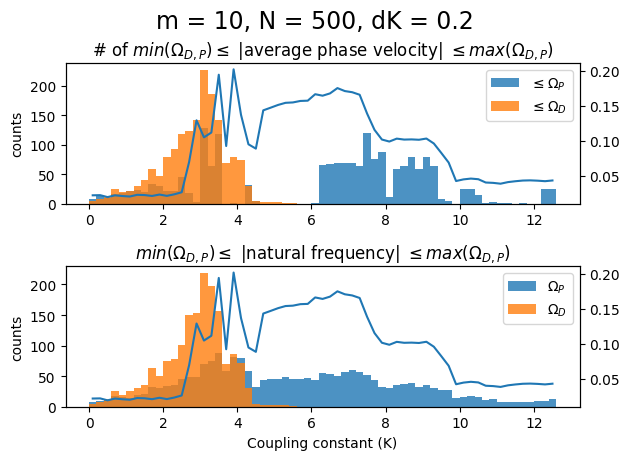

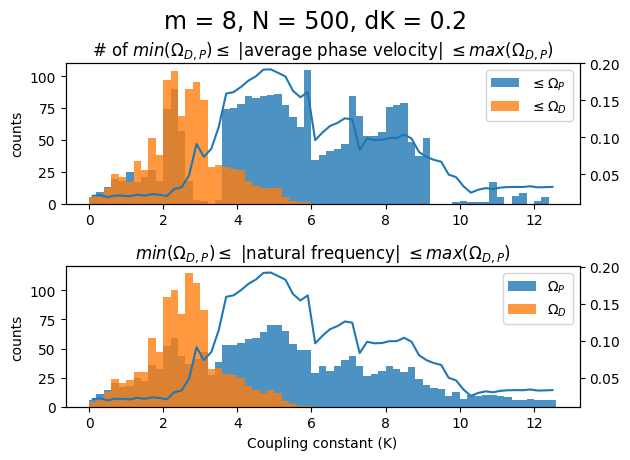

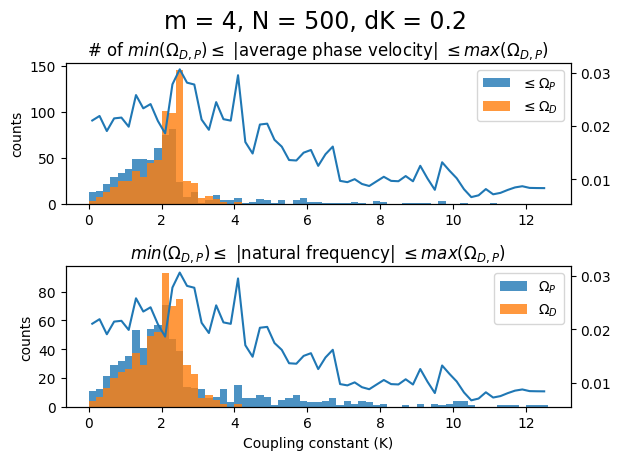

In [52]:
for m in ms:
    ODF,OPF = omega_DP(df_sets,m)
    ODR,OPR = omega_DP(rdf_sets,m)
    eff_omega_F,eff_omega_R = make_mean_phase_vel(m)
    idx_ODF_eff_m = [np.where((-ODF[i,2]<=eff_omega_F[i])&(eff_omega_F[i]<=-ODF[i,0]))[0] for i in range(len(Ks))]
    idx_ODF_eff_p = [np.where((ODF[i,0]<=eff_omega_F[i])&(eff_omega_F[i]<=ODF[i,2]))[0] for i in range(len(Ks))]
    df = df_sets[m]
    rdf = rdf_sets[m]
    omega_ = df.iloc[0].Omega
    data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    
    size_ODF_eff_m = [len(i) for i in idx_ODF_eff_m]
    size_ODF_eff_p = [len(i) for i in idx_ODF_eff_p]
    idx_OPF_eff_m = [np.where((-OPF[i,2]<=eff_omega_F[i])&(eff_omega_F[i]<=-OPF[i,0]))[0] for i in range(len(Ks))] 
    idx_OPF_eff_p = [np.where((OPF[i,0]<=eff_omega_F[i])&(eff_omega_F[i]<=OPF[i,2]))[0] for i in range(len(Ks))] 
    size_OPF_eff_m = [len(i) for i in idx_OPF_eff_m]
    size_OPF_eff_p = [len(i) for i in idx_OPF_eff_p]


    idx_ODF_m = [np.where((-ODF[i,2]<=omega_)&(omega_<=-ODF[i,0]))[0] for i in range(len(Ks))]
    idx_ODF_p = [np.where((ODF[i,0]<=omega_)&(omega_<=ODF[i,2]))[0] for i in range(len(Ks))]

    size_ODF_m = [len(i) for i in idx_ODF_m]
    size_ODF_p = [len(i) for i in idx_ODF_p]
    idx_OPF_m = [np.where((-OPF[i,2]<=omega_)&(omega_<=-OPF[i,0]))[0] for i in range(len(Ks))] 
    idx_OPF_p = [np.where((OPF[i,0]<=omega_)&(omega_<=OPF[i,2]))[0] for i in range(len(Ks))] 
    size_OPF_m = [len(i) for i in idx_OPF_m]
    size_OPF_p = [len(i) for i in idx_OPF_p]


    size_ODF_eff_m,size_ODF_eff_p,size_OPF_eff_m,size_OPF_eff_p = map(np.array,[size_ODF_eff_m,size_ODF_eff_p,size_OPF_eff_m,size_OPF_eff_p])
    size_ODF_m,size_ODF_p,size_OPF_m,size_OPF_p = map(np.array,[size_ODF_m,size_ODF_p,size_OPF_m,size_OPF_p])
    plt.figure()
    ax = plt.subplot(211)
    plt.title(
        r'# of $min(\Omega_{D,P})\leq$ |average phase velocity| $\leq max(\Omega_{D,P})$')
    # plt.bar(Ks,size_ODF_eff_m)
    plt.bar(Ks,size_OPF_eff_p+size_OPF_eff_m,dK,alpha=0.8,label =r'$\leq \Omega_P$')
    plt.bar(Ks,size_ODF_eff_p+size_ODF_eff_m,dK,alpha=0.8,label =r'$\leq \Omega_D$')
    # plt.bar(Ks,size_OPF_eff_m)
    plt.ylabel('counts')
    plt.legend()
    ax2 = ax.twinx()
    ax2.plot(Ks,data_std)
    ax = plt.subplot(212)
    plt.title(
        r'$min(\Omega_{D,P}) \leq$ |natural frequency| $\leq max(\Omega_{D,P})$')
    # plt.bar(Ks,size_ODF_m)
    plt.bar(Ks,size_OPF_p+size_OPF_m,dK,alpha=0.8,label =r'$\Omega_P$')
    plt.bar(Ks,size_ODF_p+size_ODF_m,dK,alpha=0.8,label =r'$\Omega_D$')
    # plt.bar(Ks,size_OPF_m)
    plt.legend()
    plt.ylabel('counts')
    plt.xlabel('Coupling constant (K)')
    ax2 = ax.twinx()
    ax2.plot(Ks,data_std)
    # plt.subplot(313)
    # plt.plot(Ks,data_std)
    
    plt.suptitle(f'm = {m}, N = {N}, dK = {dK}',fontsize=17,y = 0.95)
    plt.tight_layout()
    # plt.savefig(DF+f'{dist}/Check synchronization, m = {m}, N = {N}, dK = {dK}.png',dpi=400)

In [ ]:
in_PF = [] # with in the Pinning frequency of natural freq.
in_DF = [] # with in the Depinning frequency of natural freq.
in_PR = [] # with in the Pinning frequency of natural freq.
in_DR = [] # with in the Depinning frequency of natural freq.
A,B = make_mean_phase_vel(m)
for i,_ in enumerate(Ks):
    DF_ = np.r_[idx_ODF_m[i],idx_ODF_p[i]]
    PF_ = np.r_[idx_OPF_m[i],idx_OPF_p[i]]
    count,_= np.histogram(A[i][DF_],bins=bins)
    in_DF.append(count)
    count,_= np.histogram(A[i][PF_],bins=bins)
    in_PF.append(count)


    DR_ = np.r_[idx_ODR_m[i],idx_ODR_p[i]]
    PR_ = np.r_[idx_OPR_m[i],idx_OPR_p[i]]
    count,_= np.histogram(A[i][DR_],bins=bins)
    in_DR.append(count)
    count,_= np.histogram(A[i][PR_],bins=bins)
    in_PR.append(count)

in_DF,in_PF,in_DR,in_PR = map(np.array,[in_DF,in_PF,in_DR,in_PR])

In [ ]:
temp_bin = np.zeros(len(bins)-1)
temp_bin

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
ma_in_DF = np.ma.masked_where(in_DF <1, in_DF)
ma_in_PF = np.ma.masked_where(in_PF <1, in_PF)
ma_in_DR = np.ma.masked_where(in_DR <1, in_DR)
ma_in_PR = np.ma.masked_where(in_PR <1, in_PR)

In [ ]:
temp_idx = np.where(abs(B_[0,:])>0.5)

sum(in_PF[:,temp_idx])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  14,  14,  13,  31,  60, 104,  70,   6,  18,   0,
          0,   0,   0,  69,  49,  16,   2,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

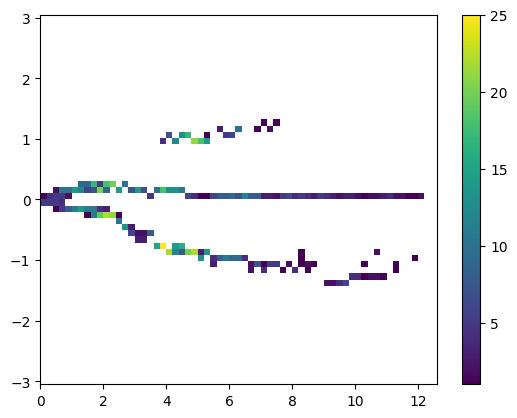

In [ ]:
plt.pcolormesh(K_,B_,ma_in_PF)
plt.colorbar()
# plt.pcolormesh(K_,B_,ma_in_P_PF)

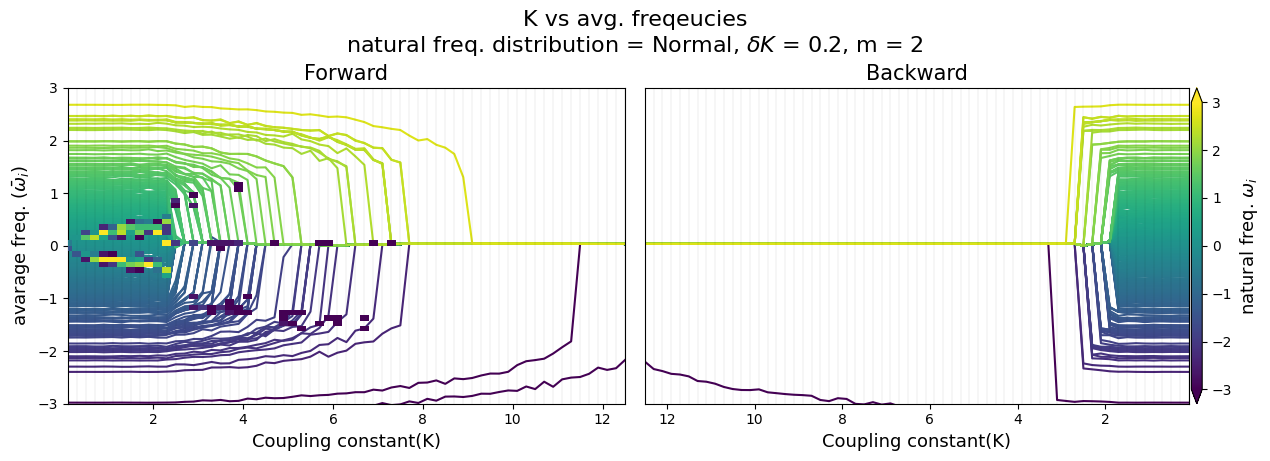

In [ ]:
color = plt.cm.viridis(N_omega)
fig = plt.figure(figsize=(12.8,4.8))
plt.subplot(121)
plt.title('Forward',fontsize=15)
sca = plt.scatter(0*omega,0*omega,s=0,c=omega,vmin=-3,vmax=3)
for i,mean_pv in enumerate(A.T):
    plt.plot(Ks,mean_pv,color = color[i]);

K_,B_ = np.mgrid[min(Ks):max(Ks):len(Ks)*1j,-3:3:(len(bins)-1)*1j]
K_r,B_ = np.mgrid[max(Ksr):min(Ksr):len(Ksr)*1j,-3:3:(len(bins)-1)*1j]
# plt.pcolormesh(K_,B_,ma_in_DF)
# plt.pcolormesh(K_,B_,ma_in_PF)
plt.pcolormesh(K_,B_,ma_in_PF,vmax=20,zorder=4)
plt.pcolormesh(K_,B_,ma_in_P_PF,vmax=20,zorder=4)
# plt.pcolormesh(K_,B_,ma_in_DF,vmax=20,zorder=4)


plt.vlines(Ks,[-3],[3],color='black',alpha=0.5,lw=0.1)
plt.xlim(0.1,12.5)
plt.xlabel('Coupling constant(K)',fontsize=13)
plt.ylabel(r'avarage freq. ($\bar{\omega}_i$)',fontsize=13)
plt.ylim(-3,3)

plt.subplot(122)
plt.title('Backward',fontsize=15)
ax2 = plt.gca()
plt.yticks([]) 
for i,mean_pv in enumerate(B.T):
    ax2.plot(Ksr,mean_pv,color = color[i]);
plt.vlines(Ksr,[-3],[3],color='black',alpha=0.5,lw=0.1)

plt.suptitle('K vs avg. freqeucies\n'+f'natural freq. distribution = {dist}, $\delta K$ = {dK}, m = {m}',fontsize=16,y=0.95)
ax2.invert_xaxis()
plt.xlim(12.5,0.1)
plt.xlabel('Coupling constant(K)',fontsize=13)
plt.ylim(-3,3)

divider3 = make_axes_locatable(ax2)
cax = divider3.append_axes("right", size="2%", pad="0.5%")
cbar =plt.colorbar(sca, cax=cax,extend='both')
cbar.set_label(r'natural freq. $\omega_i$',fontsize= 13)
plt.tight_layout()
# plt.ylim(1,3)


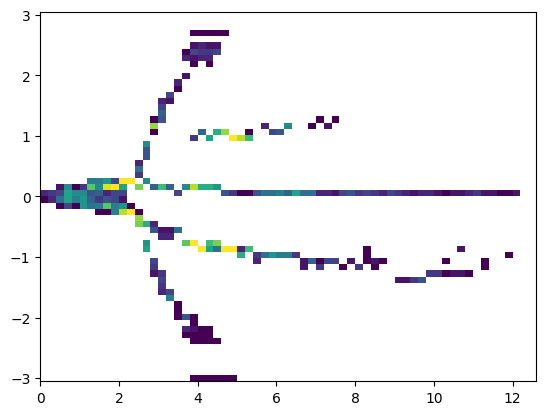

In [422]:
K_,B_ = np.mgrid[min(Ks):max(Ks):len(Ks)*1j,-3:3:(len(bins)-1)*1j]
K_r,B_ = np.mgrid[max(Ksr):min(Ksr):len(Ksr)*1j,-3:3:(len(bins)-1)*1j]
# plt.pcolormesh(K_,B_,ma_in_DF)
# plt.pcolormesh(K_,B_,ma_in_PF)
plt.pcolormesh(K_,B_,ma_in_PF,vmax=20)
plt.pcolormesh(K_,B_,ma_in_DF,vmax=20)

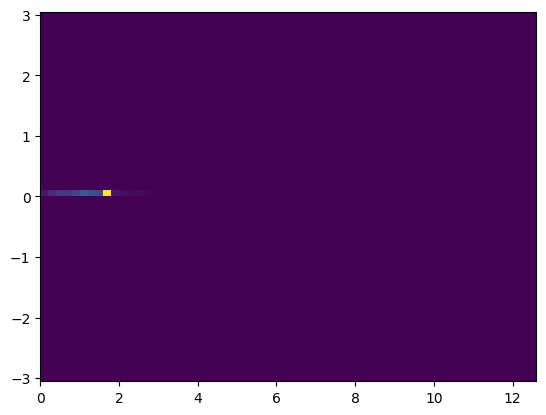

In [407]:
plt.pcolormesh(K_r,B_,in_DR)
plt.pcolormesh(K_r,B_,in_PR)


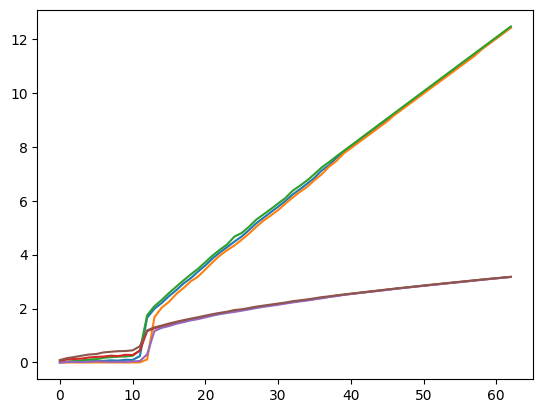

In [408]:
plt.plot(ODF)
plt.plot(OPF)

In [409]:
def for_pcolor_omega(m,d_b):
    ODf,OPf = omega_DP_(df_sets,m)
    ODr,OPr = omega_DP_(rdf_sets,m)
    bins = np.arange(-3,3+d_b/2,d_b)
    OP_ = []
    OP_r = []

    OD_ = []
    OD_r = []
    for i,_ in enumerate(Ks):
        opf = OPf[i]
        opr = OPr[i]
        count,_= np.histogram([-opf,opf],bins=bins)
        OP_.append(count)
        count,_= np.histogram([-opr,opr],bins=bins)
        OP_r.append(count)

        odf = ODf[i]
        odr = ODr[i]
        count,_= np.histogram([-odf,odf],bins=bins)
        OD_.append(count)
        count,_= np.histogram([-odr,odr],bins=bins)
        OD_r.append(count)
    OP_ = 100*np.asarray(OP_)
    OP_r = 100*np.asarray(OP_r)

    OD_ = 100*np.asarray(OD_)
    OD_r = 100*np.asarray(OD_r)
    OP_ = np.ma.masked_where(OP_ <1, OP_)
    OP_r = np.ma.masked_where(OP_r <1, OP_r)
    OD_ = np.ma.masked_where(OD_ <1, OD_)
    OD_r = np.ma.masked_where(OD_r <1, OD_r)
    return OD_,OD_r,OP_,OP_r

In [410]:
A.shape

(63, 500)

In [411]:
F_D_m = np.empty([len(Ks),np.max(size_ODF_m)])
F_D_m[:] = np.nan
F_P_m = np.empty([len(Ks),np.max(size_OPF_m)])
F_P_m[:] = np.nan
for i,size in enumerate(size_OPF_m):
    F_P_m[i,np.arange(size)] = idx_OPF_m[i]

for i,size in enumerate(size_ODF_m):
    F_D_m[i,np.arange(size)] = idx_ODF_m[i]


F_D_p = np.empty([len(Ks),np.max(size_ODF_p)])
F_D_p[:] = np.nan
F_P_p = np.empty([len(Ks),np.max(size_OPF_p)])
F_P_p[:] = np.nan
for i,size in enumerate(size_OPF_p):
    F_P_p[i,np.arange(size)] = idx_OPF_p[i]

for i,size in enumerate(size_ODF_p):
    F_D_p[i,np.arange(size)] = idx_ODF_p[i]

In [412]:
temp = np.arange(10)

In [413]:
temp[np.array([])]

IndexError: arrays used as indices must be of integer (or boolean) type

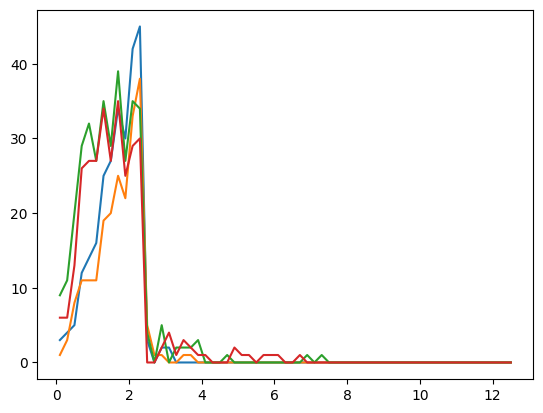

In [414]:
plt.plot(Ks,size_ODF_p)
plt.plot(Ks,size_ODF_m)
plt.plot(Ks,size_OPF_p)
plt.plot(Ks,size_OPF_m)

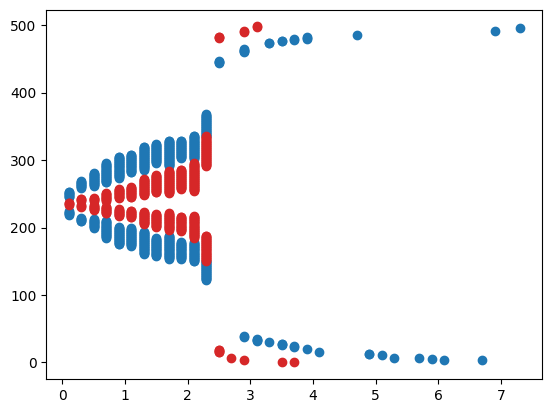

In [400]:
for i,K___ in enumerate(F_P_m.T):
    plt.scatter(Ks,K___,color='tab:blue');
    pass

for i,K___ in enumerate(F_D_m.T):
    plt.scatter(Ks,K___,color='tab:red');

for i,K___ in enumerate(F_P_p.T):
    plt.scatter(Ks,K___,color='tab:blue');
    pass

for i,K___ in enumerate(F_D_p.T):
    plt.scatter(Ks,K___,color='tab:red');

In [163]:
F_D = []
F_P = []
for i,_ in enumerate(Ks):
    i_odf = idx_ODF[i]
    i_opf = idx_OPF[i]
    try:
        f_d = A[i][i_odf]
        F_D.append(f_d)
    except IndexError:
        F_D.append(np.nan)
    try:
        f_p = A[i][i_opf]
        F_P.append(f_p)
    except IndexError:
        F_P.append(np.nan)
        # print(F_D)
        # print(F_P)

In [162]:
A.T[1].shape

(63,)

In [169]:
pd.Series(F_D).apply(len)

0      3
1      4
2      5
3     10
4     16
      ..
58     0
59     0
60     0
61     0
62     0
Length: 63, dtype: int64

In [32]:
def for_pcolor_omega(m,d_b):
    ODf,OPf = omega_DP_(df_sets,m)
    ODr,OPr = omega_DP_(rdf_sets,m)
    bins = np.arange(-3,3+d_b/2,d_b)
    OP_ = []
    OP_r = []

    OD_ = []
    OD_r = []
    for i,_ in enumerate(Ks):
        opf = OPf[i]
        opr = OPr[i]
        count,_= np.histogram([-opf,opf],bins=bins)
        OP_.append(count)
        count,_= np.histogram([-opr,opr],bins=bins)
        OP_r.append(count)

        odf = ODf[i]
        odr = ODr[i]
        count,_= np.histogram([-odf,odf],bins=bins)
        OD_.append(count)
        count,_= np.histogram([-odr,odr],bins=bins)
        OD_r.append(count)
    OP_ = 100*np.asarray(OP_)
    OP_r = 100*np.asarray(OP_r)

    OD_ = 100*np.asarray(OD_)
    OD_r = 100*np.asarray(OD_r)
    OP_ = np.ma.masked_where(OP_ <1, OP_)
    OP_r = np.ma.masked_where(OP_r <1, OP_r)
    OD_ = np.ma.masked_where(OD_ <1, OD_)
    OD_r = np.ma.masked_where(OD_r <1, OD_r)
    return OD_,OD_r,OP_,OP_r

In [61]:
whos

Variable               Type                          Data/Info
--------------------------------------------------------------
A                      ndarray                       63x500: 31500 elems, type `float64`, 252000 bytes (246.09375 kb)
A_                     ndarray                       0: 0 elems, type `int64`, 0 bytes
B                      ndarray                       63x500: 31500 elems, type `float64`, 252000 bytes (246.09375 kb)
B_                     ndarray                       63x60: 3780 elems, type `float64`, 30240 bytes
C_                     ndarray                       63x60: 3780 elems, type `int64`, 30240 bytes
C_r                    ndarray                       63x60: 3780 elems, type `int64`, 30240 bytes
Check_PM_idx_omega     function                      <function Check_PM_idx_omega at 0x282a4f640>
Create_Folder          function                      <function Create_Folder at 0x282a4f5b0>
DD                     type                          <class 'TO_

In [33]:
plt.pcolormesh(K_,B_,OD__,vmin=0,vmax=200,cmap = 'autumn')
plt.pcolormesh(K_,B_,OP__,vmin=0,vmax=200,cmap = 'winter')

NameError: name 'K_' is not defined

In [34]:
for i in K_:
    

SyntaxError: incomplete input (3128231408.py, line 2)

In [35]:
d_b = 0.1
bins = np.arange(-3,3+d_b/2,d_b)
C_ = []
C_r = []
for i,_ in enumerate(Ks):
    count,_= np.histogram(A.T[:,i],bins=bins)
    C_.append(count)
    count,_= np.histogram(B.T[:,i],bins=bins)
    C_r.append(count)
C_ = np.asarray(C_)
C_r = np.asarray(C_r)
K_,B_ = np.mgrid[min(Ks):max(Ks):len(Ks)*1j,-3:3:(len(bins)-1)*1j]
K_r,B_ = np.mgrid[max(Ksr):min(Ksr):len(Ksr)*1j,-3:3:(len(bins)-1)*1j]

In [36]:
A[idx_ODF]

NameError: name 'idx_ODF' is not defined

In [37]:
from matplotlib.colors import LogNorm

In [131]:
C__ = np.ma.masked_where(C_ <1, C_)
# plt.subplot(121)
# plt.pcolormesh(K_,B_,C_,norm=LogNorm(vmin=1, vmax=100))
# # plt.pcolormesh(K_,B_,C__,vmax=50)
# plt.subplot(122)
# plt.pcolormesh(K_r,B_,C_r,norm=LogNorm(vmin=1, vmax=100))
# ax =plt.gca() 
# ax.set_yticks([])
# ax.invert_xaxis()

# plt.colorbar()

## 여기에 나타낼 수 있는거 2가지, Kr값을 이용한 이론적인 omega_d값, 실제 omega_값값

In [46]:
ms

[6, 2, 0.95]

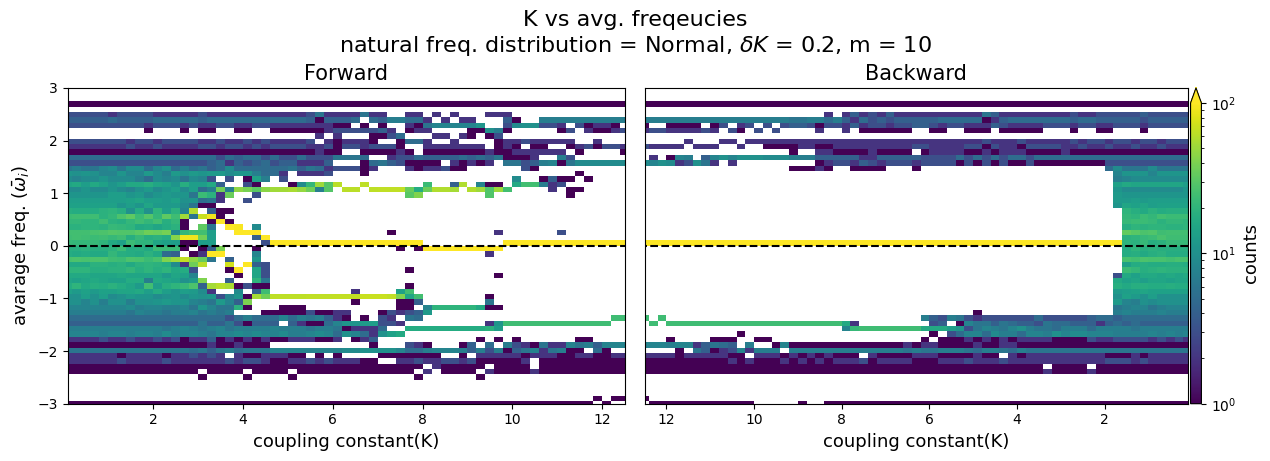

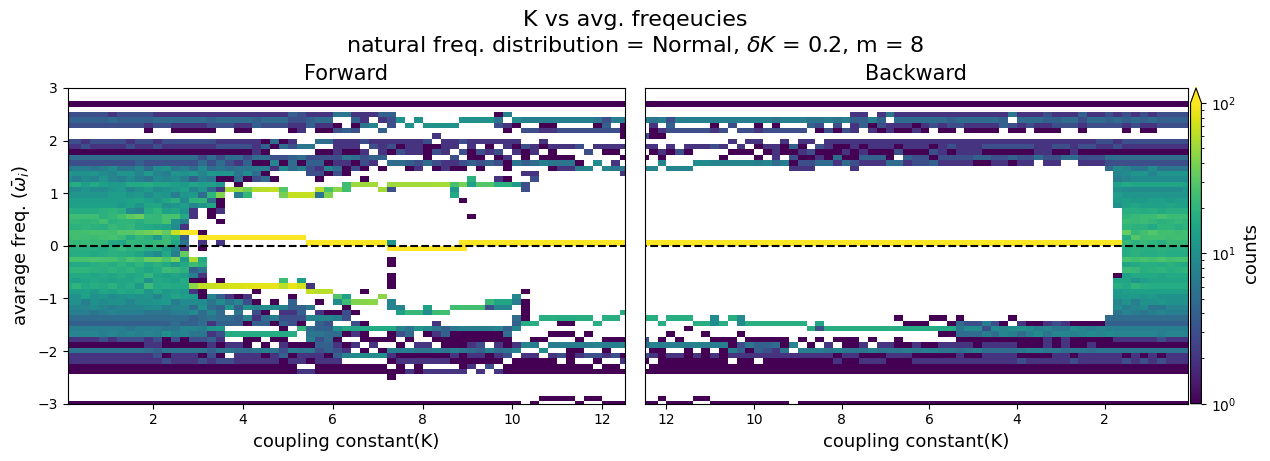

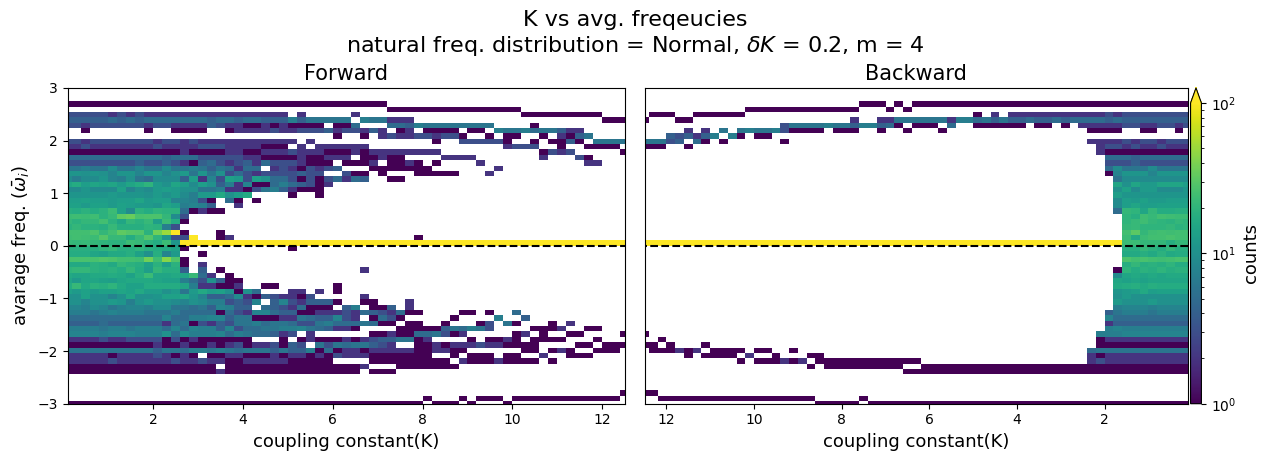

In [53]:
for m in ms:
    d_b = 0.1
    K_,K_r,B_,C_,C_r = for_pcolor(m,d_b)
    OD_,OD_r,OP_,OP_r = for_pcolor_omega(m,d_b)
    fig = plt.figure(figsize=(12.8,4.8))
    plt.subplot(121)
    plt.title('Forward',fontsize=15)
    pcolor_ = plt.pcolormesh(K_,B_,C_,norm=LogNorm(vmin=1, vmax=100))
    # plt.pcolormesh(K_,B_,OD_,vmin=0,vmax=200,cmap = 'autumn')
    # plt.pcolormesh(K_,B_,OP_,vmin=0,vmax=200,cmap = 'winter')
    plt.xlim(0.1,12.5)
    plt.xlabel('coupling constant(K)',fontsize=13)
    plt.ylabel(r'avarage freq. ($\bar{\omega}_i$)',fontsize=13)
    plt.ylim(-3,3)
    plt.hlines(0,0.1,12.5,ls = '--',color = 'black')
    plt.subplot(122)
    ax2 = plt.gca()
    plt.title('Backward',fontsize=15)
    plt.yticks([]) 
    plt.pcolormesh(K_r,B_,C_r,norm=LogNorm(vmin=1, vmax=100))
    # plt.pcolormesh(K_r,B_,OD_r,vmin=0,vmax=200,cmap = 'autumn')
    # plt.pcolormesh(K_r,B_,OP_r,vmin=0,vmax=200,cmap = 'winter')
    plt.suptitle('K vs avg. freqeucies\n'+f'natural freq. distribution = {dist}, $\delta K$ = {dK}, m = {m}',fontsize=16,y=0.95)
    ax2.invert_xaxis()
    plt.hlines(0,0.1,12.5,ls = '--',color ='black')
    plt.xlim(12.5,0.1)
    plt.xlabel('coupling constant(K)',fontsize=13)
    plt.ylim(-3,3)

    divider3 = make_axes_locatable(ax2)
    cax = divider3.append_axes("right", size="2%", pad="0.5%")
    cbar =plt.colorbar(pcolor_, cax=cax,extend='max')
    cbar.set_label(r'counts',fontsize= 13)
    plt.tight_layout()
    plt.savefig(DF+f'{dist} 01.17/pcolor K vs average freq. m={m},dK={dK},N={N}.png',dpi=400)

> 이론적인 데이터로 만든 K와 R 데이터를 이용해서 omega_D와 omega_P를 얻어볼 예정

In [54]:
m = 10
dd = DD(m = m)

In [55]:
idx_K = np.searchsorted(dd.KF,Ks)
idx_Kr = np.searchsorted(dd.KBU,Ks)
idx_K = idx_K[idx_K != 0]
idx_Kr = idx_Kr[idx_Kr != 0]

K_f_ = dd.KF[idx_K]
K_r_ = dd.KBU[idx_Kr]
R_f_ = dd.RF[idx_K]
R_r_ = dd.RBU[idx_Kr]

In [56]:
omega_Df = K_f_ * R_f_
omega_Pf = (4/np.pi) *np.sqrt(K_f_ * R_f_/m)

omega_Dr = K_r_ * R_r_
omega_Pr = (4/np.pi) *np.sqrt(K_r_ * R_r_/m)

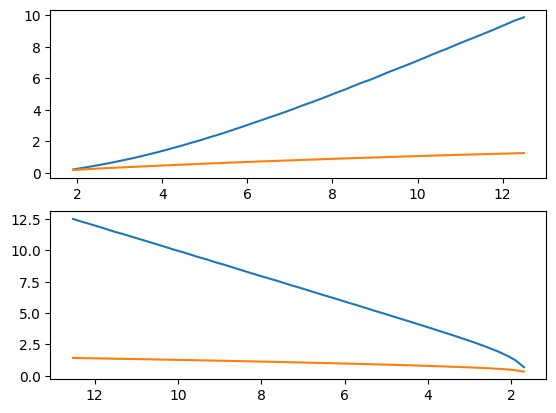

In [57]:
plt.subplot(211)
plt.plot(K_f_,omega_Df)
plt.plot(K_f_,omega_Pf)
plt.subplot(212)
plt.gca().invert_xaxis()
plt.plot(K_r_,omega_Dr)
plt.plot(K_r_,omega_Pr)

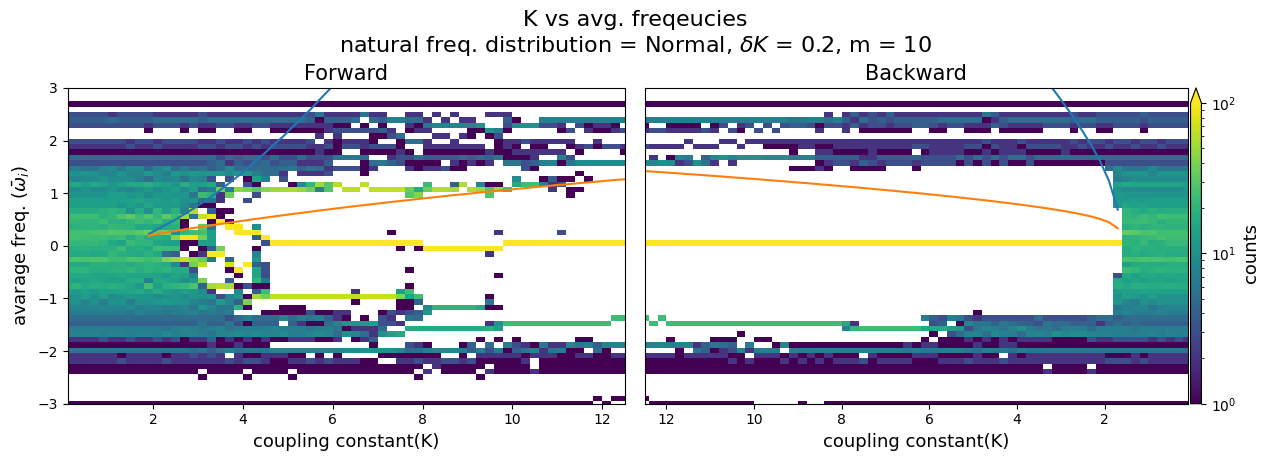

In [58]:
d_b = 0.1
K_,K_r,B_,C_,C_r = for_pcolor(m,d_b)
fig = plt.figure(figsize=(12.8,4.8))
plt.subplot(121)
plt.title('Forward',fontsize=15)
plt.plot(K_f_,omega_Df)
plt.plot(K_f_,omega_Pf)
pcolor_ = plt.pcolormesh(K_,B_,C_,norm=LogNorm(vmin=1, vmax=100))
plt.xlim(0.1,12.5)
plt.xlabel('coupling constant(K)',fontsize=13)
plt.ylabel(r'avarage freq. ($\bar{\omega}_i$)',fontsize=13)
plt.ylim(-3,3)

plt.subplot(122)
ax2 = plt.gca()
plt.title('Backward',fontsize=15)
plt.yticks([]) 
plt.pcolormesh(K_r,B_,C_r,norm=LogNorm(vmin=1, vmax=100))
plt.plot(K_r_,omega_Dr)
plt.plot(K_r_,omega_Pr)
plt.suptitle('K vs avg. freqeucies\n'+f'natural freq. distribution = {dist}, $\delta K$ = {dK}, m = {m}',fontsize=16,y=0.95)
ax2.invert_xaxis()
plt.xlim(12.5,0.1)
plt.xlabel('coupling constant(K)',fontsize=13)
plt.ylim(-3,3)

divider3 = make_axes_locatable(ax2)
cax = divider3.append_axes("right", size="2%", pad="0.5%")
cbar =plt.colorbar(pcolor_, cax=cax,extend='max')
cbar.set_label(r'counts',fontsize= 13)
plt.tight_layout()
# plt.savefig(DF+f'{dist} 01.17/pcolor K vs average freq. m={m},dK={dK},N={N}.png',dpi=400)

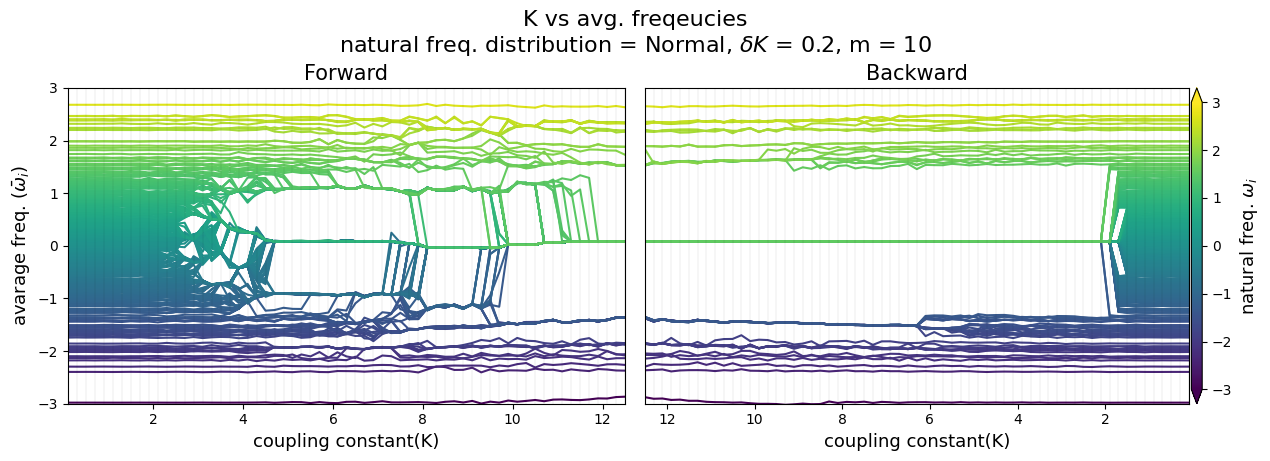

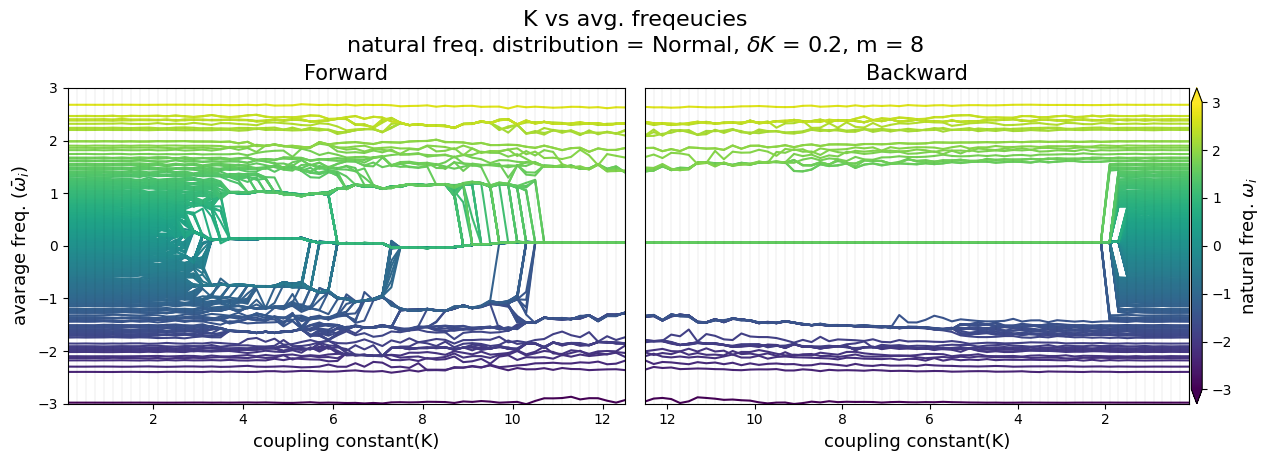

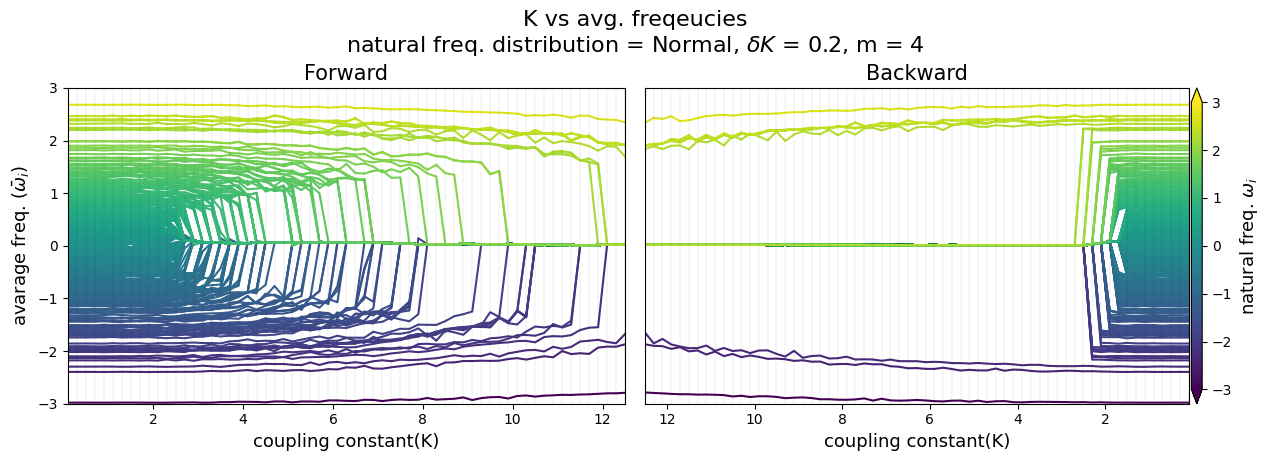

In [59]:
omega = df.iloc[0].Omega
N_omega = (omega-np.min(omega))/(np.max(omega)-np.min(omega))
N_omega = (omega+3)/(6)
Create_Folder(DF+f'{dist}/')
for m in ms:
    df = df_sets[m]
    rdf = rdf_sets[m]
    temp_df = df.dtheta_s.apply(mean_wtime)
    temp_rdf = rdf.dtheta_s.apply(mean_wtime)
    A = np.array(temp_df.to_list())
    B = np.array(temp_rdf.to_list())
    omega = df.iloc[0].Omega
    N_omega = (omega-np.min(omega))/(np.max(omega)-np.min(omega))
    N_omega = (omega+3)/6
    ODf,OPf = omega_DP(df_sets,m)
    ODr,OPr = omega_DP(rdf_sets,m)
    color = plt.cm.viridis(N_omega)
    fig = plt.figure(figsize=(12.8,4.8))
    plt.subplot(121)
    plt.title('Forward',fontsize=15)
    sca = plt.scatter(0*omega,0*omega,s=0,c=omega,vmin=-3,vmax=3)
    for i,mean_pv in enumerate(A.T):
        plt.plot(Ks,mean_pv,color = color[i]);
    # plt.plot(Ks,ODf,color='tab:orange')
    # plt.plot(Ks,-ODf,color='tab:orange')
    # plt.plot(Ks,OPf,color='tab:blue')
    # plt.plot(Ks,-OPf,color='tab:blue')
    plt.vlines(Ks,[-3],[3],color='black',alpha=0.5,lw=0.1)
    plt.xlim(0.1,12.5)
    plt.xlabel('coupling constant(K)',fontsize=13)
    plt.ylabel(r'avarage freq. ($\bar{\omega}_i$)',fontsize=13)
    plt.ylim(-3,3)

    plt.subplot(122)
    plt.title('Backward',fontsize=15)
    ax2 = plt.gca()
    plt.yticks([]) 
    for i,mean_pv in enumerate(B.T):
        ax2.plot(Ksr,mean_pv,color = color[i]);
    plt.vlines(Ksr,[-3],[3],color='black',alpha=0.5,lw=0.1)

    # plt.plot(Ksr,ODr,color='tab:orange')
    # plt.plot(Ksr,-ODr,color='tab:orange')
    # plt.plot(Ksr,OPr,color='tab:blue')
    # plt.plot(Ksr,-OPr,color='tab:blue')
    plt.suptitle('K vs avg. freqeucies\n'+f'natural freq. distribution = {dist}, $\delta K$ = {dK}, m = {m}',fontsize=16,y=0.95)
    ax2.invert_xaxis()
    plt.xlim(12.5,0.1)
    plt.xlabel('coupling constant(K)',fontsize=13)
    plt.ylim(-3,3)

    divider3 = make_axes_locatable(ax2)
    cax = divider3.append_axes("right", size="2%", pad="0.5%")
    cbar =plt.colorbar(sca, cax=cax,extend='both')
    cbar.set_label(r'natural freq. $\omega_i$',fontsize= 13)
    plt.tight_layout()
    plt.savefig(DF+f'{dist}/K vs average freq. m={m},dK={dK},N={N}.png',dpi=400)
    # plt.ylim(1,3)